In [66]:
!pip install -q keras

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import numpy as np
import os


In [70]:
from tensorflow.python.keras.models import Model,Sequential
from tensorflow.python.keras.layers import Dense,Flatten,Dropout

In [71]:
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam, RMSprop


#Path JOin

In [72]:
def path_join(dirname, filenames):
  return [os.path.join(dirname,fname) for fname in filenames]


##Helper-function for loading images

The data-set is not loaded into memory, instead it has a list of the files for the images in the training-set and another list of the files for the images in the test-set. This helper-function loads some image-files.


In [6]:
def load_images(image_paths):
  images=[plt.imread(img_path) for img_path in image_paths]
  
  return np.asarray(images)

In [7]:
!ls

datalab


In [73]:
!ls

datalab  Drive	My


#Connecting with Drive

In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p My Drive
!google-drive-ocamlfuse My Drive


!ls My Drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > My Drive/created.txt



#Resume

In [74]:
train_dir='Drive/IndIan_Food_DatasetM/train'
test_dir='Drive/IndIan_Food_DatasetM/test'
#!ls Drive/IndIan_Food_DatasetM/train/01_rasmalai/
#!ls Drive/IndIan_Food_DatasetM/test/

In [12]:
model=VGG16(include_top=True,weights='imagenet')

553467904/553467096 [==============================] - 15s 0us/step


In [75]:
#First we need to know the shape of the tensors expected as input by the pre-trained VGG16 model.
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [76]:
datagen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [79]:
datagen_test= ImageDataGenerator(rescale=1./255)

In [80]:
batch_size=20

In [81]:
if True:
  save_to_dir=None
else:
  save_to_dir='augumented_img/'

In [82]:
input_shape = model.layers[0].output_shape[1:3]
input_shape

(224, 224)

In [131]:

generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    save_to_dir=save_to_dir)

Found 3242 images belonging to 6 classes.


In [132]:

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 732 images belonging to 6 classes.


In [86]:
"""import os
path = '/content/Drive/IndIan_Food_DatasetM/test/05_jalebi/'
files = os.listdir(path)
i = 1

for file in files:
    print(os.path.join(path, file),"to")
    
    print(os.path.join(path, str(i)+'.jpeg'))
    os.rename(os.path.join(path, file), os.path.join(path, str(i)+'.jpeg'))
    i = i+1"""

'import os\npath = \'/content/Drive/IndIan_Food_DatasetM/test/05_jalebi/\'\nfiles = os.listdir(path)\ni = 1\n\nfor file in files:\n    print(os.path.join(path, file),"to")\n    \n    print(os.path.join(path, str(i)+\'.jpeg\'))\n    os.rename(os.path.join(path, file), os.path.join(path, str(i)+\'.jpeg\'))\n    i = i+1'

###Test Data Rename(Ignore)

In [0]:
"""import os
parent = '/content/Drive/IndIan_Food_DatasetM/test/'
for folder in os.listdir(parent):
  path= os.path.join(parent,folder)
  files = os.listdir(path)
  print (files)
  i = 1
  for file in files:
    print(os.path.join(path, file),"to")
    
    print(os.path.join(path, str(file)+'.jpeg'))
    os.rename(os.path.join(path, file), os.path.join(path, str(file)+'.jpeg'))
    i = i+1
   
  """

###Train Dta Rename(Ignore)

In [0]:
"""import os
parent = '/content/Drive/IndIan_Food_DatasetM/train/'
for folder in os.listdir(parent):
  path= os.path.join(parent,folder)
  files = os.listdir(path)
  print (files)
  i = 1
  for file in files:
    print(os.path.join(path, file),"to")
    
    print(os.path.join(path, str(file)+'.jpeg'))
    os.rename(os.path.join(path, file), os.path.join(path, str(file)+'.jpeg'))
    i = i+1"""

##zxc

In [87]:
steps_test = generator_test.n / batch_size
steps_test

36.6

In [88]:
generator_train.filenames[0]

'01_rasmalai/1.jpeg'

In [89]:
#Creating Paths
image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

In [90]:
#Class Numbers
cls_train=generator_train.classes
cls_test=generator_train.classes

In [91]:
#CLass NAames
class_names=list(generator_train.class_indices.keys())

In [92]:
class_names

['01_rasmalai',
 '02_poha',
 '03_chole_bhature',
 '04_gulab_jamun',
 '05_jalebi',
 '06_dosa']

In [93]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [94]:
num_classes = generator_train.num_classes
num_classes

6

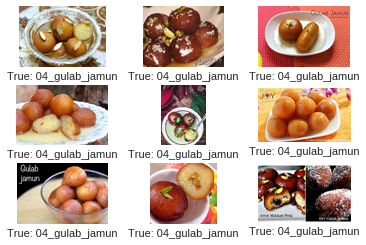

In [95]:
images = load_images(image_paths=image_paths_train[1808:1817])


cls_true = cls_train[1808:1817]

plot_images(images=images, cls_true=cls_true, smooth=True)

In [96]:
from sklearn.utils.class_weight import compute_class_weight

In [97]:
from sklearn.utils.class_weight import compute_class_weight
class_weight=compute_class_weight(class_weight='balanced',classes=np.unique(cls_train),y=cls_train)

In [98]:
from sklearn.utils.class_weight import compute_class_weight
class_weight=compute_class_weight(class_weight='balanced',classes=np.unique(cls_train),y=cls_train)
class_weight

array([1.04715762, 1.01949686, 1.05533854, 1.00247372, 1.02724968,
       0.8729133 ])

In [99]:
class_names

['01_rasmalai',
 '02_poha',
 '03_chole_bhature',
 '04_gulab_jamun',
 '05_jalebi',
 '06_dosa']

#Predict Function

In [100]:
def predict(image_path):

    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    
    plt.imshow(img_resized)
    plt.show()

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    pred = model.predict(img_array)
    
    
    pred_decoded = decode_predictions(pred)[0]

    # Print the predictions.
    for code, name, score in pred_decoded:
        print("{0:>6.2%} : {1}".format(score, name))

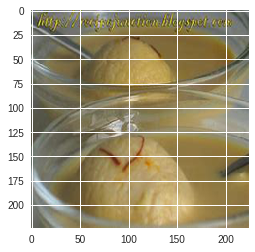

62.87% : beaker
22.11% : Petri_dish
14.33% : measuring_cup
 0.15% : candle
 0.15% : mixing_bowl


In [101]:
predict(image_path=image_paths_train[0])

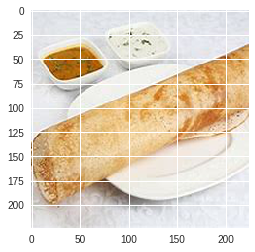

14.04% : bathtub
11.27% : remote_control
 9.76% : toilet_seat
 7.37% : can_opener
 7.12% : tub


In [102]:
predict(image_path=image_paths_train[3000])

### The pre-trained VGG16 model was unable to classify images from our dataset. The reason is that the VGG16 model was trained on the ImageNet dataset which may not have contained many images of IndIan Food Items.

In [103]:
transfer_layer = model.get_layer('block5_pool')

In [104]:
transfer_layer.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(?, 7, 7, 512) dtype=float32>

In [105]:
conv_model=Model(inputs=model.input,outputs=transfer_layer.output)

In [106]:
new_model= Sequential()

In [107]:
new_model.add(conv_model)

new_model.add(Flatten())

new_model.add(Dense(1024,activation='relu'))

new_model.add(Dropout(0.5))

new_model.add(Dense(num_classes,activation='softmax'))

In [108]:
optimizer = Adam(lr=1e-5)

In [109]:
loss = 'categorical_crossentropy'

In [110]:
metrics = ['categorical_accuracy']

## Freezing the Trainable Conv_layer

In [111]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [119]:
print_layer_trainable()

False:	input_1
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
False:	block4_conv1
False:	block4_conv2
False:	block4_conv3
False:	block4_pool
False:	block5_conv1
False:	block5_conv2
False:	block5_conv3
False:	block5_pool


In [121]:
conv_model.trainable = False

In [122]:

for layer in conv_model.layers:
    layer.trainable = False

In [123]:
print_layer_trainable()

False:	input_1
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
False:	block4_conv1
False:	block4_conv2
False:	block4_conv3
False:	block4_pool
False:	block5_conv1
False:	block5_conv2
False:	block5_conv3
False:	block5_pool


In [127]:
epochs

20

In [128]:
new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [129]:
epochs = 20
steps_per_epoch = 100

In [133]:
import time 
t=time.time()
history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  class_weight=class_weight,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)
tic=time.time()
print("That took ",tic-t)

Epoch 1/20
100/100 [==============================] - 54s 543ms/step - loss: 1.0138 - categorical_accuracy: 0.6396 - val_loss: 0.5412 - val_categorical_accuracy: 0.8661
Epoch 2/20
100/100 [==============================] - 51s 514ms/step - loss: 0.9442 - categorical_accuracy: 0.6595 - val_loss: 0.5206 - val_categorical_accuracy: 0.8484
Epoch 3/20
100/100 [==============================] - 50s 502ms/step - loss: 0.8977 - categorical_accuracy: 0.6740 - val_loss: 0.4761 - val_categorical_accuracy: 0.8716
Epoch 4/20
 25/100 [======>.......................] - ETA: 25s - loss: 0.7975 - categorical_accuracy: 0.6940

100/100 [==============================] - 51s 514ms/step - loss: 0.8331 - categorical_accuracy: 0.6910 - val_loss: 0.4468 - val_categorical_accuracy: 0.8757
Epoch 5/20
100/100 [==============================] - 51s 514ms/step - loss: 0.8222 - categorical_accuracy: 0.7115 - val_loss: 0.4262 - val_categorical_accuracy: 0.8743
Epoch 6/20
100/100 [==============================] - 51s 512ms/step - loss: 0.8223 - categorical_accuracy: 0.7120 - val_loss: 0.4140 - val_categorical_accuracy: 0.8784
Epoch 7/20
 35/100 [=========>....................] - ETA: 21s - loss: 0.7995 - categorical_accuracy: 0.7071

100/100 [==============================] - 51s 511ms/step - loss: 0.7637 - categorical_accuracy: 0.7190 - val_loss: 0.4102 - val_categorical_accuracy: 0.8702
Epoch 8/20
100/100 [==============================] - 51s 513ms/step - loss: 0.7734 - categorical_accuracy: 0.7315 - val_loss: 0.3980 - val_categorical_accuracy: 0.8811
Epoch 9/20
100/100 [==============================] - 52s 521ms/step - loss: 0.7361 - categorical_accuracy: 0.7470 - val_loss: 0.3991 - val_categorical_accuracy: 0.8743
Epoch 10/20
 36/100 [=========>....................] - ETA: 21s - loss: 0.7879 - categorical_accuracy: 0.7181

100/100 [==============================] - 50s 502ms/step - loss: 0.7607 - categorical_accuracy: 0.7285 - val_loss: 0.3542 - val_categorical_accuracy: 0.9030
Epoch 11/20
100/100 [==============================] - 51s 507ms/step - loss: 0.7266 - categorical_accuracy: 0.7450 - val_loss: 0.3585 - val_categorical_accuracy: 0.9030
Epoch 12/20
100/100 [==============================] - 51s 512ms/step - loss: 0.7180 - categorical_accuracy: 0.7370 - val_loss: 0.3789 - val_categorical_accuracy: 0.8907
Epoch 13/20
 36/100 [=========>....................] - ETA: 21s - loss: 0.6890 - categorical_accuracy: 0.7583

100/100 [==============================] - 50s 499ms/step - loss: 0.6991 - categorical_accuracy: 0.7580 - val_loss: 0.3531 - val_categorical_accuracy: 0.8893
Epoch 14/20
100/100 [==============================] - 54s 544ms/step - loss: 0.6999 - categorical_accuracy: 0.7570 - val_loss: 0.3314 - val_categorical_accuracy: 0.9003
Epoch 15/20
100/100 [==============================] - 51s 511ms/step - loss: 0.6824 - categorical_accuracy: 0.7665 - val_loss: 0.3261 - val_categorical_accuracy: 0.8975
Epoch 16/20
 36/100 [=========>....................] - ETA: 21s - loss: 0.6151 - categorical_accuracy: 0.7722

100/100 [==============================] - 51s 511ms/step - loss: 0.6596 - categorical_accuracy: 0.7755 - val_loss: 0.3056 - val_categorical_accuracy: 0.9139
Epoch 17/20
100/100 [==============================] - 50s 501ms/step - loss: 0.6602 - categorical_accuracy: 0.7740 - val_loss: 0.3310 - val_categorical_accuracy: 0.9030
Epoch 18/20
100/100 [==============================] - 51s 510ms/step - loss: 0.6529 - categorical_accuracy: 0.7795 - val_loss: 0.3074 - val_categorical_accuracy: 0.9139
Epoch 19/20
 36/100 [=========>....................] - ETA: 20s - loss: 0.6726 - categorical_accuracy: 0.7583

100/100 [==============================] - 51s 509ms/step - loss: 0.6485 - categorical_accuracy: 0.7700 - val_loss: 0.2964 - val_categorical_accuracy: 0.9167
Epoch 20/20
100/100 [==============================] - 51s 507ms/step - loss: 0.6456 - categorical_accuracy: 0.7755 - val_loss: 0.3156 - val_categorical_accuracy: 0.8975
That took  1025.863868713379


In [134]:
1026/60

17.1

#Training HIstory

In [135]:
def plot_training_history(history):
    
    acc = history.history['categorical_accuracy']
    loss = history.history['loss']

    val_acc = history.history['val_categorical_accuracy']
    val_loss = history.history['val_loss']

    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(loss, 'o', color='b', label='Training Loss')
    
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.plot(val_loss, 'o', color='r', label='Test Loss')

    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

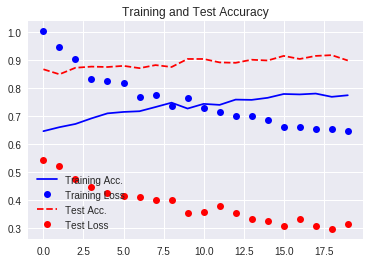

In [136]:
plot_training_history(history)

In [137]:
def predict_new(image_path):
    
    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    
    plt.imshow(img_resized)
    plt.show()

    img_array = np.expand_dims(np.array(img_resized), axis=0)

    pred = new_model.predict(img_array)
    print (pred)
    print (class_names[np.argmax(pred)])
    

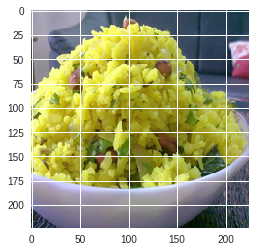

[[0. 1. 0. 0. 0. 0.]]
02_poha


In [138]:
predict_new(image_path='Drive/poha.jpg')


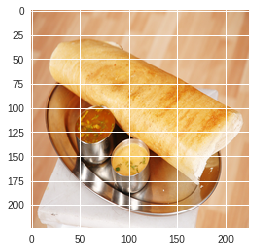

[[0.000000e+00 0.000000e+00 0.000000e+00 4.998504e-37 0.000000e+00
  1.000000e+00]]
06_dosa


In [139]:
predict_new(image_path='Drive/dosa.jpg')


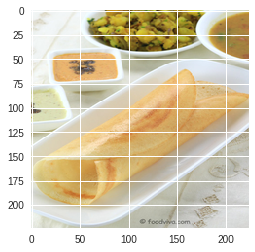

[[1.8580865e-18 1.0534483e-11 3.1624663e-37 1.0423131e-16 2.9558319e-19
  1.0000000e+00]]
06_dosa


In [140]:
predict_new(image_path='Drive/dosa2.jpg')


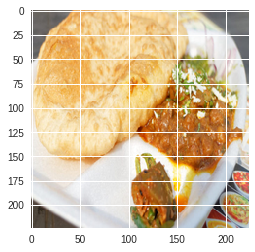

[[0.0000000e+00 1.7185615e-17 1.0400550e-20 1.0826073e-15 1.0000000e+00
  7.4995479e-23]]
05_jalebi


['01_rasmalai',
 '02_poha',
 '03_chole_bhature',
 '04_gulab_jamun',
 '05_jalebi',
 '06_dosa']

In [147]:
predict_new(image_path='Drive/cb.jpg')
class_names

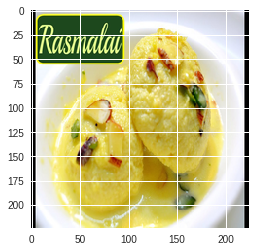

[[0.0000000e+00 4.1877786e-31 0.0000000e+00 1.0000000e+00 1.2093706e-18
  0.0000000e+00]]
04_gulab_jamun


In [151]:
predict_new(image_path='Drive/rm3.jpg')


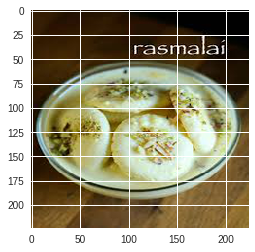

[[1.4029054e-05 9.9998593e-01 7.1391837e-11 5.3841795e-23 0.0000000e+00
  1.5658225e-30]]
02_poha


In [152]:
predict_new(image_path='Drive/rm4.jpeg')


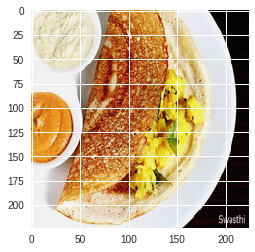

[[0.0000000e+00 2.3519088e-02 6.8285541e-28 1.1705073e-28 1.2097126e-17
  9.7648096e-01]]
06_dosa


In [143]:
predict_new(image_path='Drive/dosa6.jpg')


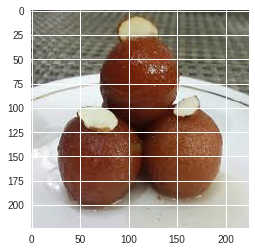

[[0. 0. 0. 1. 0. 0.]]
04_gulab_jamun


In [141]:
predict_new(image_path='Drive/gj.jpeg')


In [142]:
result = new_model.evaluate_generator(generator_test, steps=steps_test)

In [153]:
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 89.75%


In [154]:
conv_model.trainable = True

In [155]:
for layer in conv_model.layers:
    
    trainable = ('block5' in layer.name or 'block4' in layer.name)
    
    layer.trainable = trainable


In [156]:
print_layer_trainable()

False:	input_1
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


In [157]:
optimizer_fine = Adam(lr=1e-7)

In [158]:
new_model.compile(optimizer=optimizer_fine, loss=loss, metrics=metrics)

In [159]:


history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  class_weight=class_weight,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)



Epoch 1/20
100/100 [==============================] - 60s 601ms/step - loss: 0.6120 - categorical_accuracy: 0.7800 - val_loss: 0.3022 - val_categorical_accuracy: 0.9085
Epoch 2/20
100/100 [==============================] - 55s 550ms/step - loss: 0.6160 - categorical_accuracy: 0.7880 - val_loss: 0.2966 - val_categorical_accuracy: 0.9098
Epoch 3/20
100/100 [==============================] - 55s 550ms/step - loss: 0.5925 - categorical_accuracy: 0.7950 - val_loss: 0.2881 - val_categorical_accuracy: 0.9112
Epoch 4/20
 25/100 [======>.......................] - ETA: 28s - loss: 0.5985 - categorical_accuracy: 0.8060

100/100 [==============================] - 55s 552ms/step - loss: 0.6008 - categorical_accuracy: 0.8000 - val_loss: 0.2833 - val_categorical_accuracy: 0.9112
Epoch 5/20
100/100 [==============================] - 56s 556ms/step - loss: 0.6081 - categorical_accuracy: 0.7790 - val_loss: 0.2787 - val_categorical_accuracy: 0.9112
Epoch 6/20
100/100 [==============================] - 55s 551ms/step - loss: 0.6214 - categorical_accuracy: 0.7795 - val_loss: 0.2754 - val_categorical_accuracy: 0.9112
Epoch 7/20
 35/100 [=========>....................] - ETA: 24s - loss: 0.5359 - categorical_accuracy: 0.8143

100/100 [==============================] - 56s 557ms/step - loss: 0.5673 - categorical_accuracy: 0.7995 - val_loss: 0.2713 - val_categorical_accuracy: 0.9126
Epoch 8/20
100/100 [==============================] - 55s 553ms/step - loss: 0.5841 - categorical_accuracy: 0.7815 - val_loss: 0.2689 - val_categorical_accuracy: 0.9126
Epoch 9/20
100/100 [==============================] - 58s 578ms/step - loss: 0.5843 - categorical_accuracy: 0.8105 - val_loss: 0.2650 - val_categorical_accuracy: 0.9126
Epoch 10/20
 36/100 [=========>....................] - ETA: 24s - loss: 0.5764 - categorical_accuracy: 0.7917

100/100 [==============================] - 55s 548ms/step - loss: 0.5618 - categorical_accuracy: 0.7886 - val_loss: 0.2622 - val_categorical_accuracy: 0.9098
Epoch 11/20
100/100 [==============================] - 55s 554ms/step - loss: 0.5613 - categorical_accuracy: 0.8030 - val_loss: 0.2577 - val_categorical_accuracy: 0.9112
Epoch 12/20
100/100 [==============================] - 56s 559ms/step - loss: 0.5606 - categorical_accuracy: 0.7980 - val_loss: 0.2570 - val_categorical_accuracy: 0.9112
Epoch 13/20
 36/100 [=========>....................] - ETA: 24s - loss: 0.5564 - categorical_accuracy: 0.8000

100/100 [==============================] - 53s 531ms/step - loss: 0.5528 - categorical_accuracy: 0.8140 - val_loss: 0.2538 - val_categorical_accuracy: 0.9112
Epoch 14/20
100/100 [==============================] - 58s 580ms/step - loss: 0.5675 - categorical_accuracy: 0.8015 - val_loss: 0.2517 - val_categorical_accuracy: 0.9139
Epoch 15/20
100/100 [==============================] - 55s 545ms/step - loss: 0.5585 - categorical_accuracy: 0.8040 - val_loss: 0.2492 - val_categorical_accuracy: 0.9112
Epoch 16/20
 36/100 [=========>....................] - ETA: 25s - loss: 0.5870 - categorical_accuracy: 0.7986

100/100 [==============================] - 56s 556ms/step - loss: 0.5533 - categorical_accuracy: 0.8085 - val_loss: 0.2478 - val_categorical_accuracy: 0.9139
Epoch 17/20
100/100 [==============================] - 56s 556ms/step - loss: 0.5352 - categorical_accuracy: 0.8115 - val_loss: 0.2462 - val_categorical_accuracy: 0.9153
Epoch 18/20
100/100 [==============================] - 55s 551ms/step - loss: 0.5331 - categorical_accuracy: 0.8190 - val_loss: 0.2434 - val_categorical_accuracy: 0.9153
Epoch 19/20
 36/100 [=========>....................] - ETA: 24s - loss: 0.5897 - categorical_accuracy: 0.8014

100/100 [==============================] - 55s 554ms/step - loss: 0.5462 - categorical_accuracy: 0.8165 - val_loss: 0.2429 - val_categorical_accuracy: 0.9167
Epoch 20/20
100/100 [==============================] - 55s 546ms/step - loss: 0.5670 - categorical_accuracy: 0.8040 - val_loss: 0.2418 - val_categorical_accuracy: 0.9180


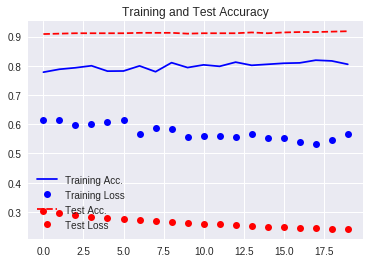

In [160]:
plot_training_history(history)

### Hmmmmm why the Lower Train Set Accuracy?   Answer is........ Dropout during training!
*The training loss is based upon the specific randomly selected dropped-out network for that record, which is much less likely to be well tuned than the loss when using the full network on the validation data.*

In [161]:
result2 = new_model.evaluate_generator(generator_test, steps=steps_test)

In [162]:
print("Test-set classification accuracy: {0:.2%}".format(result2[1]))

Test-set classification accuracy: 91.80%


##Test-set classification accuracy: 91.80%

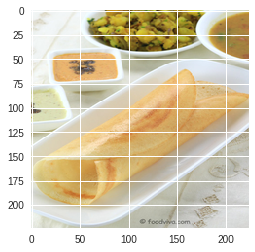

[[1.2106634e-25 1.5912753e-13 0.0000000e+00 9.7488567e-21 9.2349876e-23
  1.0000000e+00]]
06_dosa


In [163]:
predict_new(image_path='Drive/dosa2.jpg')


####*P*.S. DOSA is the most under-represented class see class weights

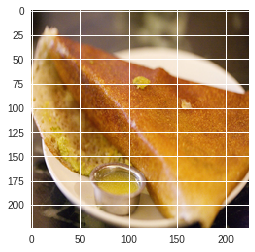

[[0.000000e+00 0.000000e+00 0.000000e+00 3.836404e-23 0.000000e+00
  1.000000e+00]]
06_dosa


In [164]:
predict_new(image_path='Drive/dosa3.jpg')



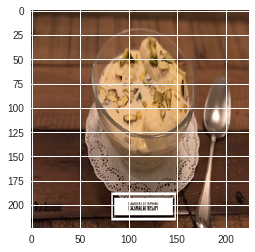

[[4.4755840e-12 9.9957186e-01 2.9153229e-13 4.2807698e-04 0.0000000e+00
  2.6900258e-22]]
02_poha


In [169]:
predict_new(image_path='Drive/rm2.jpg')


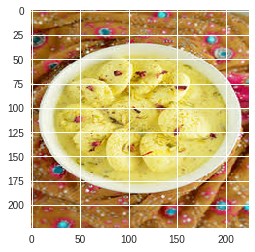

[[1. 0. 0. 0. 0. 0.]]
01_rasmalai


In [170]:
predict_new(image_path='Drive/rm5.jpeg')


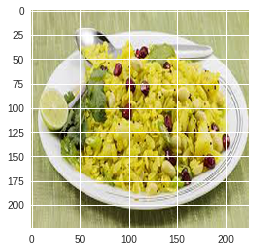

[[0. 1. 0. 0. 0. 0.]]
02_poha


In [142]:
predict_new(image_path='Drive/poha1.jpeg')
